<a href="https://colab.research.google.com/github/Mhtag/tensorflow/blob/main/06_image_classification_with_cnns.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [ ]:
(train_data, train_labels),(test_data, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


## Explore the data

In [ ]:
# show the first training example

print(f'training example:\n{train_data[0]}\n')
print(f'training label:\n{train_labels[0]}')

training example:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1 

In [ ]:
train_data[0].shape, train_data.shape

((28, 28), (60000, 28, 28))

In [ ]:
# create a small list 
class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']
len(class_names)

10

### Vizualize the Data

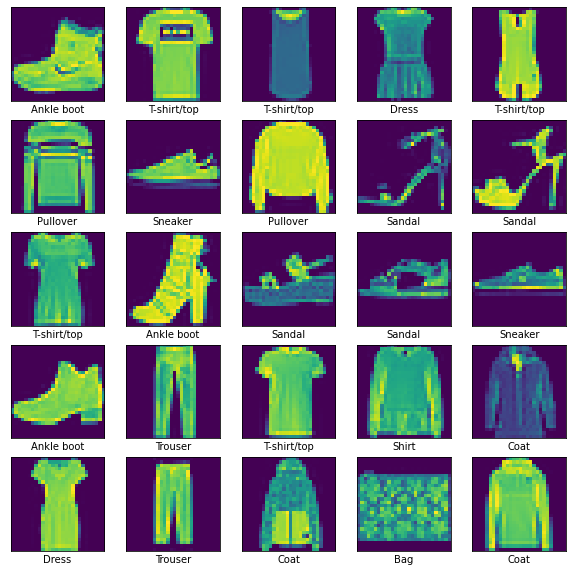

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,1+i)
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(train_data[i])
  plt.xlabel(class_names[train_labels[i]])
plt.show()

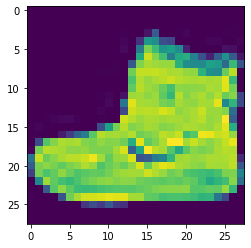

In [ ]:
plt.imshow(train_data[0])

## Preprocess the data

In [ ]:
# Check the max and min value of our data set
train_data.max(), train_data.min()

(255, 0)

In [ ]:
# normalizing our data
train_data_norm = train_data/255
test_data_norm = test_data/255

train_data_norm[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [ ]:
# Canging the dmension of our data set as conv2D requite 4 dimensional data set
train_data_norm_exp = np.expand_dims(train_data_norm, axis=-1).astype('float32')
test_data_norm_exp = np.expand_dims(test_data_norm, axis=-1).astype('float32')
train_data_norm_exp[0].shape, test_data_norm_exp[0].shape


((28, 28, 1), (28, 28, 1))

### Vizualize the processed data

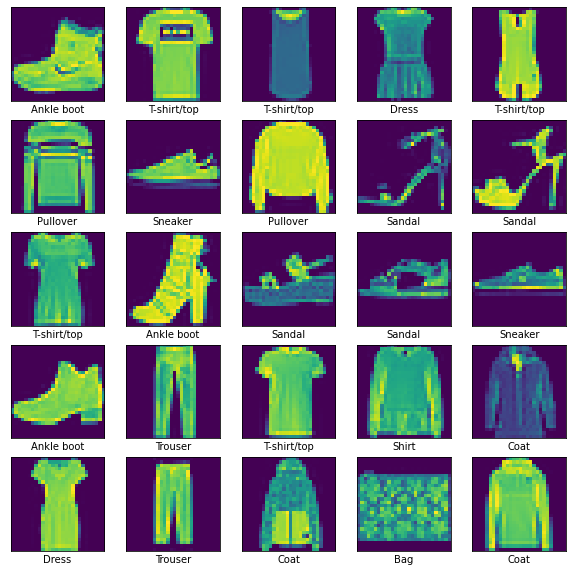

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,1+i)
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(train_data_norm[i])
  plt.xlabel(class_names[train_labels[i]])
plt.show()

## Built the model

In [ ]:
model_1 = tf.keras.Sequential([
                               tf.keras.layers.Conv2D(32, (3,3), activation='relu',padding='same', input_shape=(28,28,1)),
                               tf.keras.layers.MaxPooling2D((2,2)),
                               tf.keras.layers.Conv2D(64, (3,3),padding='same', activation='relu'),
                               tf.keras.layers.MaxPooling2D((2,2)),
                               tf.keras.layers.Flatten(),
                               tf.keras.layers.Dense(128, activation='relu'),
                               tf.keras.layers.Dense(10, activation='softmax')
])

In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               401536    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

### Compile the Model

In [ ]:
model_1.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer='Adam',
                metrics=['accuracy'])



### Train the Model

In [ ]:
history_1 = model_1.fit(train_data_norm_exp, train_labels, epochs=10)

                        #validation_data=(test_data_norm, test_labels))

Epoch 1/10
1875/1875 [==============================] - 41s 6ms/step - loss: 0.4039 - accuracy: 0.8545
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2658 - accuracy: 0.9039
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2208 - accuracy: 0.9179
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1865 - accuracy: 0.9305
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1601 - accuracy: 0.9404
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1343 - accuracy: 0.9497
Epoch 7/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1131 - accuracy: 0.9585
Epoch 8/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0934 - accuracy: 0.9660
Epoch 9/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0786 - accuracy: 0.9710
Epoch 10/10
1875/1875 [==============================] - 11s 6ms/step - l

### Making prediction

In [ ]:
y_probs = model_1.predict(test_data_norm_exp)

y_probs[0], tf.argmax(y_probs[0]), class_names[tf.argmax(y_probs[0])]

(array([5.7845222e-12, 3.5964828e-16, 7.7992193e-15, 2.1900744e-15,
        1.4901550e-11, 3.5993999e-12, 7.0945701e-11, 3.7596301e-06,
        2.9902597e-14, 9.9999619e-01], dtype=float32),
 <tf.Tensor: shape=(), dtype=int64, numpy=9>,
 'Ankle boot')

In [ ]:
# convert all the probabilities into integers
y_pred = y_probs.argmax(axis=1)
y_pred[:5]

array([9, 2, 1, 1, 6])

### Confusion Matrix

In [ ]:
cm = confusion_matrix(test_labels, y_pred)
cm

array([[839,   1,  24,  22,   2,   1, 106,   1,   4,   0],
       [  1, 983,   0,  12,   2,   0,   1,   0,   1,   0],
       [ 14,   1, 877,  11,  48,   0,  49,   0,   0,   0],
       [ 10,   2,   6, 949,  16,   0,  17,   0,   0,   0],
       [  1,   0,  55,  26, 876,   0,  42,   0,   0,   0],
       [  0,   0,   0,   0,   0, 965,   0,  28,   0,   7],
       [ 74,   1,  48,  36,  64,   0, 773,   0,   4,   0],
       [  0,   0,   0,   0,   0,   0,   0, 992,   0,   8],
       [  3,   0,   0,   8,   2,   1,   6,   4, 975,   1],
       [  0,   0,   0,   0,   0,   2,   1,  54,   0, 943]])

In [ ]:
cm_df = pd.DataFrame(cm,
                     index=class_names,
                     columns=class_names)
cm_df

,T-shirt/top,Trouser,Pullover,Dress,Coat,Sandal,Shirt,Sneaker,Bag,Ankle boot
T-shirt/top,839,1,24,22,2,1,106,1,4,0
Trouser,1,983,0,12,2,0,1,0,1,0
Pullover,14,1,877,11,48,0,49,0,0,0
Dress,10,2,6,949,16,0,17,0,0,0
Coat,1,0,55,26,876,0,42,0,0,0
Sandal,0,0,0,0,0,965,0,28,0,7
Shirt,74,1,48,36,64,0,773,0,4,0
Sneaker,0,0,0,0,0,0,0,992,0,8
Bag,3,0,0,8,2,1,6,4,975,1
Ankle boot,0,0,0,0,0,2,1,54,0,943


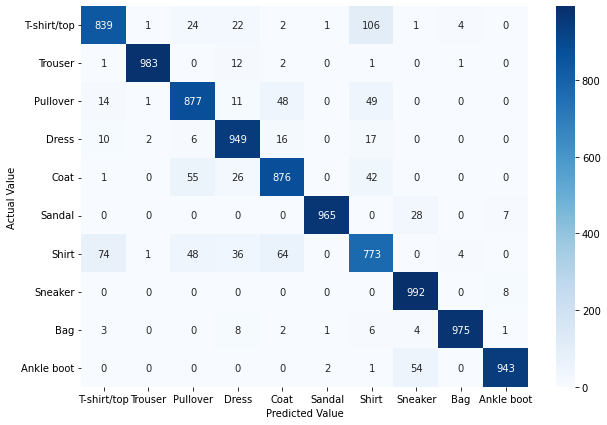

In [ ]:
# Plotting the confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(cm_df, annot=True, fmt='d', cmap=plt.cm.Blues)
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.show()

In [ ]:
def plot_random_image()